In [1]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()

In [23]:
import subprocess as sp
import networkx as nx
from eden.util import display
import re

class First:
    # A class tha take a sequence and apply the RNAfold then generate Networkx graph from it's structure
    # sequence='ACGUAGCUAGCUAGCAGUCUAGCUAGCAUCG'
    def subprocess_wrapper(self, sequence):
        flags='--noPS'
        cmd = 'echo "%s" | RNAfold %s' % (sequence, flags)
        out = sp.check_output(cmd, shell=True)
        text = out.strip().split('\n')
        seq= text[0]
        struc= text[1].split()[0]
        #print out
        print ("text:", text)
        print ("seq:", seq)
        print ("dotbrackets:", struc)
        return seq, struc

    def string_to_graph(self, seq, struc):
        print "build"
        seq= seq[0]
        G = nx.Graph()
        for i,letter in enumerate(seq):
            G.add_node(i, label = seq[i])
            if i > 0:
                G.add_edge(i-1, i, label = 'x')
        return G
    
    def graph_display(self, seq, struc):
        print "display"
        #for text in words:
        word_graph = First.string_to_graph(self, seq, struc)
        display.draw_graph(word_graph,node_size=100, font_size=9, node_border=True, size_x_to_y_ratio=3, prog='circo')
    
    #Recognize basepairs and add them to the generated graph

    def basepair_relation(self, seq, struc):
        seq = seq[0]
        struc = struc[1].split()[0]
        open_pran = "("
        close_pran = ")"
        stack = []
        stack_s = []
        G = nx.Graph()
        for l, m in enumerate(seq):
            for i, k in enumerate(struc):
                G.add_node(i, label = seq[i])
                if i > 0:
                    G.add_edge(i-1, i, label= 'x')
                if struc[i] == open_pran:
                    j = i
                    stack_s.append(struc[i])
                    stack.append(struc[i])
                if struc[i] == close_pran:
                    stack_s.pop()
                    G.add_edge(i, j, label = 'b')
        display.draw_graph(G, node_size=180, font_size=9, node_border=True, size_x_to_y_ratio=10, prog='circo')

    def call_all(self):
        sequence = 'ACGUAGCUAGCUAGCAGUCUAGCUAGCAUCC'
        seq = First.subprocess_wrapper(self, sequence)
        struc = First.subprocess_wrapper(self, sequence)
        print "Graph without base pairing"
        First.graph_display(self, seq, struc)
        print "Graph with base pairing"
        First.basepair_relation(self, seq, struc)
    
    

('text:', ['ACGUAGCUAGCUAGCAGUCUAGCUAGCAUCC', '.....(((((((((....))))))))).... (-13.80)'])
('seq:', 'ACGUAGCUAGCUAGCAGUCUAGCUAGCAUCC')
('dotbrackets:', '.....(((((((((....)))))))))....')
('text:', ['ACGUAGCUAGCUAGCAGUCUAGCUAGCAUCC', '.....(((((((((....))))))))).... (-13.80)'])
('seq:', 'ACGUAGCUAGCUAGCAGUCUAGCUAGCAUCC')
('dotbrackets:', '.....(((((((((....)))))))))....')
Graph without base pairing
display
build


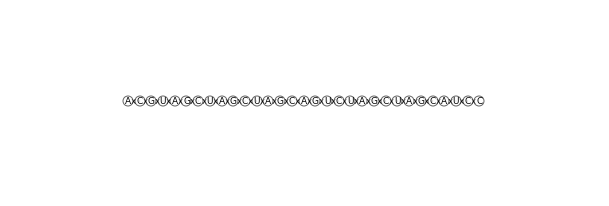

Graph with base pairing


/home/alshaikm/anaconda/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/home/alshaikm/anaconda/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


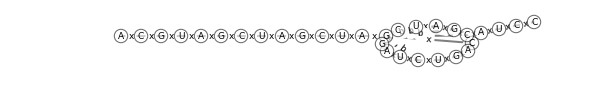

In [24]:
x = First()
x.call_all()